In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import math

In [2]:
data = pd.read_csv('/content/Data_With_Label.csv')

In [3]:
data

,type,sentences,Quanlity,Price,Packaging,Service
0,0,i recently purchased the pepsi cola soda 12oz ...,1,0,0,0
1,0,"as a long-time fan of pepsi, i was thrilled to...",1,0,0,0
2,0,the perfect balance of sweetness and carbonati...,1,0,0,0
3,0,"whether enjoyed alone or paired with a meal, p...",1,0,0,0
4,0,the 24-pack size is ideal for stocking up the ...,0,0,1,0
...,...,...,...,...,...,...
1203,0,"love the price,",0,1,0,0
1204,0,delivery is great.,0,0,0,1
1205,0,the price is right,0,1,0,0
1206,0,i snagged this at a good price.,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       1208 non-null   int64 
 1   sentences  1208 non-null   object
 2   Quanlity   1208 non-null   int64 
 3   Price      1208 non-null   int64 
 4   Packaging  1208 non-null   int64 
 5   Service    1208 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 56.8+ KB


In [4]:
data["sentences"] = data['sentences'].str.replace(".","")
data["sentences"] = data['sentences'].str.replace("!","")
data["sentences"] = data['sentences'].str.replace("?","")
data["sentences"] = data['sentences'].str.replace(",","")
data["sentences"] = data['sentences'].str.replace('"',"")
data["sentences"] = data['sentences'].str.replace('“',"")
data["sentences"] = data['sentences'].str.replace('”',"")
data["sentences"] = data['sentences'].str.replace('('," ")
data["sentences"] = data['sentences'].str.replace(')'," ")
data["sentences"] = data['sentences'].str.replace('/',"")

In [ ]:
data["sentences"]

0       i recently purchased the pepsi cola soda 12oz ...
1       as a long-time fan of pepsi i was thrilled to ...
2       the perfect balance of sweetness and carbonati...
3       whether enjoyed alone or paired with a meal pe...
4       the 24-pack size is ideal for stocking up the ...
                              ...                        
1203                                       love the price
1204                                    delivery is great
1205                                   the price is right
1206                       i snagged this at a good price
1207                                           good price
Name: sentences, Length: 1208, dtype: object

In [5]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

word_dict = {"'t" : "ot","'re" : " are","'s" : " is", "'ve" : " have"}

def processSen(sen):
  s = ''
  word_trans = ''
  add_bol = True

  for word in sen:
    if (word == ' ' or ord(word) >= 65) and add_bol == True:
      s += word
    elif word == "'" or add_bol == False:
      add_bol = False
      word_trans += word
      if word_trans in word_dict:
        s += word_dict[word_trans]
        word_trans = ''
        add_bol = True


  s_2 = ''
  for word in s.split():
    s_2 += stemmer.stem(word) + ' '

  return s_2

data_preprocess = pd.DataFrame()
sentence_list = []
for i, sentence in enumerate(data['sentences']):
  sentence_list.append(processSen(data['sentences'][i]))

data_preprocess['sentences'] = sentence_list
data_preprocess['Quanlity'] = data['Quanlity']
data_preprocess['Price'] = data['Price']
data_preprocess['Packaging'] = data['Packaging']
data_preprocess['Service'] = data['Service']

In [ ]:
data_preprocess

,sentences,Quanlity,Price,Packaging,Service
0,i rec purchas the peps col sod oz can pack fro...,1,0,0,0
1,as a longtim fan of peps i was thrilled to fin...,1,0,0,0
2,the perfect bal of sweet and carbon mak every ...,1,0,0,0
3,wheth enjoy alon or pair with a meal peps is d...,1,0,0,0
4,the pack siz is id for stock up the pantry or ...,0,0,1,0
...,...,...,...,...,...
1203,lov the pric,0,1,0,0
1204,delivery is gre,0,0,0,1
1205,the pric is right,0,1,0,0
1206,i snag thi at a good pric,0,1,0,0


<Axes: >

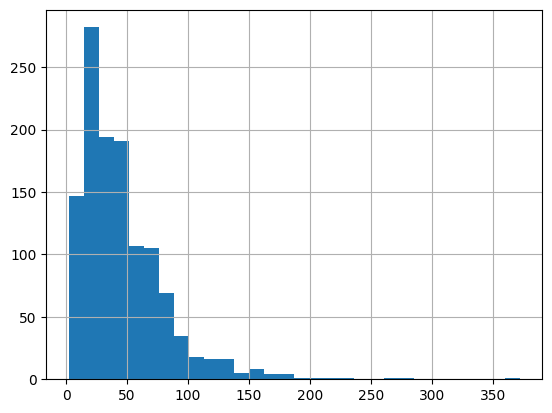

In [6]:
df_sentence = data_preprocess['sentences']

sentence_length = [len(i) for i in df_sentence]
pd.Series(sentence_length).hist(bins=30)

In [7]:
tokenizer_data = Tokenizer(oov_token = '<OOV>', filters = '', split = ' ')
tokenizer_data.fit_on_texts(df_sentence)
tokenized_data_train = tokenizer_data.texts_to_sequences(df_sentence)
vec_data = pad_sequences(tokenized_data_train, padding = 'post', maxlen = 25)

In [ ]:
vec_data

array([[  3, 389,  81, ...,   0,   0,   0],
       [  7, 176,  12, ..., 332,  31,  78],
       [  2, 101, 463, ...,   0,   0,   0],
       ...,
       [  2,  25,   8, ...,   0,   0,   0],
       [  3, 736,  12, ...,   0,   0,   0],
       [ 33,  25,   0, ...,   0,   0,   0]], dtype=int32)

In [8]:
X = vec_data
y = np.array(data_preprocess[['Quanlity', 'Price', 'Packaging', 'Service']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)


In [9]:
def processLabel(Label):
  a = 1
  for item in Label:
    if item != 0:
      a *= item
  if a == 1:
    return np.append([1],abs(Label))
  if a == -1:
    return np.append([-1],abs(Label))
y_pro = processLabel(y[0])
for index in range(1,len(y)):
  y_pro = np.vstack((y_pro,processLabel(y[index])))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pro, test_size= 0.2, random_state = 42)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def multiple_label_predict(X_train, X_test, y_train_df, y_test_df):
  result = None
  for label in range(0,5,1):
    y_train = y_train_df[:,label]
    y_test = y_test_df[:,label]

    model = KNeighborsClassifier(n_neighbors = 15)
    model.fit(X_train, y_train)

    y_predict = (model.predict(X_test)).reshape(-1,1)
    if result is None:
      result = y_predict
    else:
      result = np.concatenate((result, y_predict), axis=1)
  return result

In [14]:
result = multiple_label_predict(X_train, X_test, y_train, y_test)

In [15]:
from sklearn.metrics import classification_report

for i in range(5):
  print(classification_report(result[:,i:i+1], y_test[:,i:i+1], digits = 4))

              precision    recall  f1-score   support

          -1     0.0820    0.4545    0.1389        11
           1     0.9669    0.7576    0.8495       231

    accuracy                         0.7438       242
   macro avg     0.5244    0.6061    0.4942       242
weighted avg     0.9266    0.7438    0.8172       242

              precision    recall  f1-score   support

           0     0.9778    0.7426    0.8441       237
           1     0.0161    0.2000    0.0299         5

    accuracy                         0.7314       242
   macro avg     0.4970    0.4713    0.4370       242
weighted avg     0.9579    0.7314    0.8273       242

              precision    recall  f1-score   support

           0     0.9953    0.8838    0.9363       241
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.8802       242
   macro avg     0.4977    0.4419    0.4681       242
weighted avg     0.9912    0.8802    0.9324       242

              preci

In [ ]:
#xet accuracy tren tong 4 label

correct = 0
for i in range(len(result)):
  count = 0
  for j in range(4):
    if(result[i,j:j+1] == y_test[i,j:j+1]):
      count = count + 1
  if(count == 3):
    correct = correct + 1
print(correct / len(result))


0.22727272727272727


In [ ]:
from sklearn import svm
def multiple_label_SVM_predict(X_train, X_test, y_train_df, y_test_df):
  result = None
  for label in range(0,6,1):
    y_train = y_train_df[:,label]
    y_test = y_test_df[:,label]

    model = svm.SVC()
    model.fit(X_train, y_train)

    y_predict = (model.predict(X_test)).reshape(-1,1)
    if result is None:
      result = y_predict
    else:
      result = np.concatenate((result, y_predict), axis=1)
  return result

In [ ]:
result_SVM = multiple_label_SVM_predict(X_train, X_test, y_train, y_test)

In [ ]:
for i in range(6):
  print(classification_report(result_SVM[:,i:i+1], y_test[:,i:i+1], digits = 4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.9890    0.7458    0.8504       240

    accuracy                         0.7397       242
   macro avg     0.4945    0.3729    0.4252       242
weighted avg     0.9808    0.7397    0.8433       242

              precision    recall  f1-score   support

           0     0.9890    0.7458    0.8504       240
           1     0.0000    0.0000    0.0000         2

    accuracy                         0.7397       242
   macro avg     0.4945    0.3729    0.4252       242
weighted avg     0.9808    0.7397    0.8433       242

              precision    recall  f1-score   support

           0     1.0000    0.7438    0.8531       242
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.7438       242
   macro avg     0.5000    0.3719    0.4265       242
weighted avg     1.0000    0.7438    0.8531       242

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [ ]:
from sklearn import linear_model
def multiple_label_predict_1(X_train, X_test, y_train_df, y_test_df):
  result = None
  for label in range(0,4,1):
    y_train = y_train_df[:,label]
    y_test = y_test_df[:,label]

    model = linear_model.LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')
    model.fit(X_train, y_train)

    y_predict = (model.predict(X_test)).reshape(-1,1)
    if result is None:
      result = y_predict
    else:
      result = np.concatenate((result, y_predict), axis=1)
  return result

In [ ]:
result_1 = multiple_label_predict_1(X_train, X_test, y_train, y_test)